Цена акций

In [ ]:
!pip -q install autokeras terra-ai-datasets-framework
!pip -q install auto-ts


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gdown
from auto_ts import auto_timeseries

In [3]:
URL = 'https://storage.yandexcloud.net/terraai/sources/shares.zip'
download_filename = gdown.download(URL, None, quiet = True)
!unzip -q {download_filename} -d '/content/data'
!rm -rf {download_filename}

data = pd.read_csv('data/POLYb_1d.csv')
data['<DATE>'] = pd.to_datetime(data['<DATE>'], format='%Y%m%d')

# Доп. 10 столбцов изменения Close (pct_change)
for i in range(1, 11):
    data[f'pct_ch_{i}'] = data['<CLOSE>'].pct_change(i)
data.dropna(inplace=True)
data.drop(columns=['<TICKER>', '<PER>', '<TIME>'], inplace=True)

display(data.describe().loc[['min', 'max']])
display(data.info())

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,pct_ch_1,pct_ch_2,pct_ch_3,pct_ch_4,pct_ch_5,pct_ch_6,pct_ch_7,pct_ch_8,pct_ch_9,pct_ch_10
min,410.0,419.0,396.5,410.0,1811.0,-0.126649,-0.128711,-0.160981,-0.177748,-0.185352,-0.174940,-0.182570,-0.182390,-0.205317,-0.228507
max,2035.0,2084.5,2005.0,2049.3,10911995.0,0.161561,0.161268,0.210634,0.239122,0.342439,0.321366,0.377515,0.364267,0.382220,0.360522


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 10 to 1464
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   <DATE>     1455 non-null   datetime64[ns]
 1   <OPEN>     1455 non-null   float64       
 2   <HIGH>     1455 non-null   float64       
 3   <LOW>      1455 non-null   float64       
 4   <CLOSE>    1455 non-null   float64       
 5   <VOL>      1455 non-null   int64         
 6   pct_ch_1   1455 non-null   float64       
 7   pct_ch_2   1455 non-null   float64       
 8   pct_ch_3   1455 non-null   float64       
 9   pct_ch_4   1455 non-null   float64       
 10  pct_ch_5   1455 non-null   float64       
 11  pct_ch_6   1455 non-null   float64       
 12  pct_ch_7   1455 non-null   float64       
 13  pct_ch_8   1455 non-null   float64       
 14  pct_ch_9   1455 non-null   float64       
 15  pct_ch_10  1455 non-null   float64       
dtypes: datetime64[ns](1), float64(14), int64(

None

Start of Fit.....
    Target variable given as = <CLOSE>
Start of loading of data.....
    Inputs: ts_column = <DATE>, sep = ,, target = ['<CLOSE>']
    Using given input: pandas dataframe...
    <DATE> column exists in given train data...
    train data shape = (1300, 15)
Alert: Could not detect strf_time_format of <DATE>. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


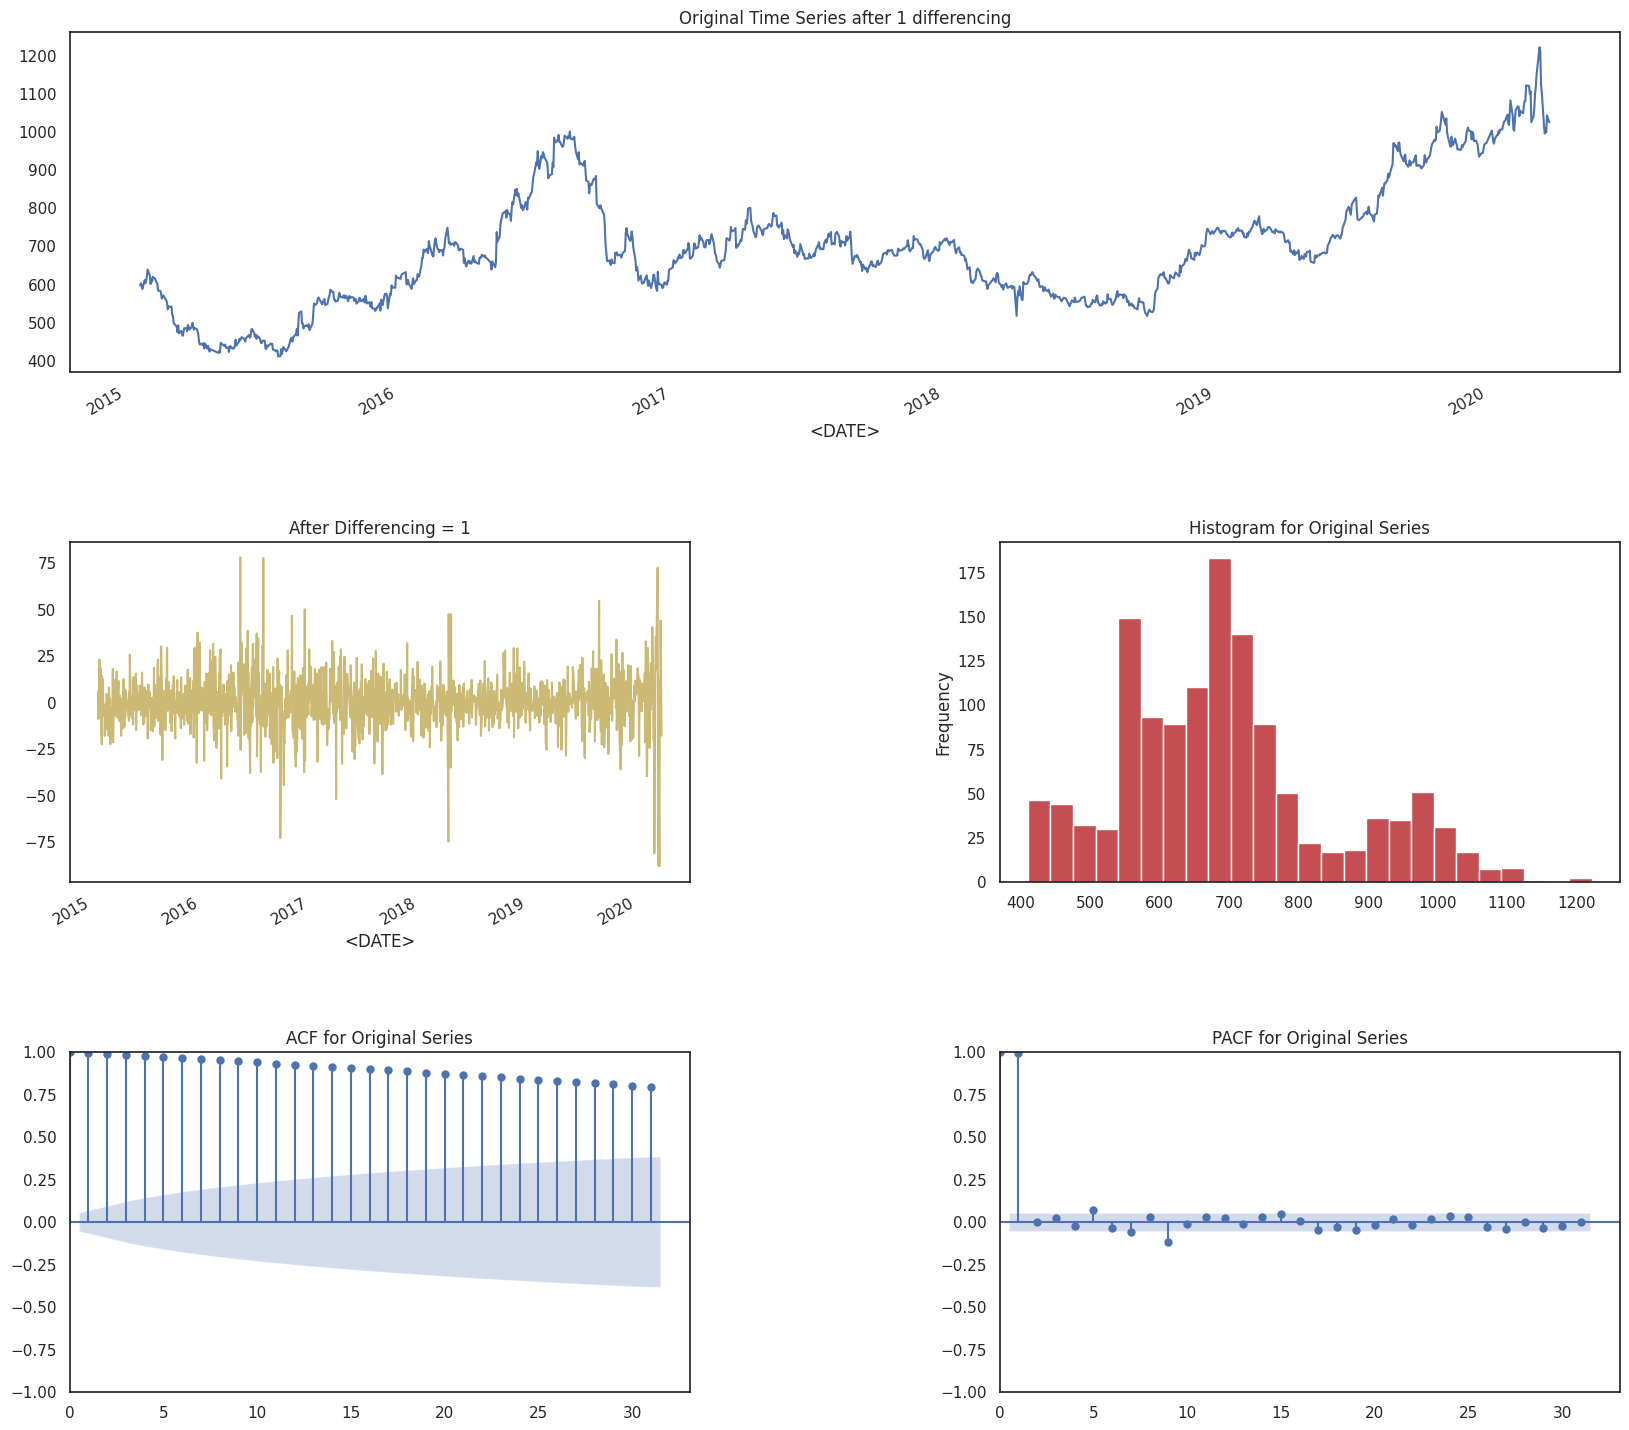

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/a1lyfm0j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/te4n2q0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50715', 'data', 'file=/tmp/tmp3wkxnlx4/a1lyfm0j.json', 'init=/tmp/tmp3wkxnlx4/te4n2q0y.json', 'output', 'file=/tmp/tmp3wkxnlx4/prophet_modelh3em8h70/prophet_model-20240202091613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
09:16:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(1300, 16)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 1275 Test Shape: 5


09:16:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/r0b5sdz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/imfill0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35111', 'data', 'file=/tmp/tmp3wkxnlx4/r0b5sdz8.json', 'init=/tmp/tmp3wkxnlx4/imfill0a.json', 'output', 'file=/tmp/tmp3wkxnlx4/prophet_model49wb5o9t/prophet_model-20240202091613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
09:16:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 25.96
    Std Deviation of actuals = 13.56
    Normalized RMSE (as pct of std dev) = 191%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 1280 Test Shape: 5


09:16:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/k6qxebrc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/4tbuijk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63184', 'data', 'file=/tmp/tmp3wkxnlx4/k6qxebrc.json', 'init=/tmp/tmp3wkxnlx4/4tbuijk7.json', 'output', 'file=/tmp/tmp3wkxnlx4/prophet_modelfl64r020/prophet_model-20240202091614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
09:16:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 41.00
    Std Deviation of actuals = 35.71
    Normalized RMSE (as pct of std dev) = 115%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 1285 Test Shape: 5


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/vyob_sww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/ygjvcblf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12390', 'data', 'file=/tmp/tmp3wkxnlx4/vyob_sww.json', 'init=/tmp/tmp3wkxnlx4/ygjvcblf.json', 'output', 'file=/tmp/tmp3wkxnlx4/prophet_model7505w2ve/prophet_model-20240202091614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
09:16:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 69.53
    Std Deviation of actuals = 38.34
    Normalized RMSE (as pct of std dev) = 181%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 1290 Test Shape: 5


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/404qnklg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/mxgja0uj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15029', 'data', 'file=/tmp/tmp3wkxnlx4/404qnklg.json', 'init=/tmp/tmp3wkxnlx4/mxgja0uj.json', 'output', 'file=/tmp/tmp3wkxnlx4/prophet_modelhw0kin3s/prophet_model-20240202091615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
09:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 65.12
    Std Deviation of actuals = 75.65
    Normalized RMSE (as pct of std dev) = 86%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 1295 Test Shape: 5


09:16:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 97.86
    Std Deviation of actuals = 17.64
    Normalized RMSE (as pct of std dev) = 555%
Cross Validation window: 5 completed


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/rqqqo_ht.json



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 55.75
    MSE (Mean Squared Error = 4200.82
    MAPE (Mean Absolute Percent Error) = 5%
    RMSE (Root Mean Squared Error) = 64.8137
    Normalized RMSE (MinMax) = 29%
    Normalized RMSE (as Std Dev of Actuals)= 109%
Time Taken = 3 seconds


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wkxnlx4/7ntsxx5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78004', 'data', 'file=/tmp/tmp3wkxnlx4/rqqqo_ht.json', 'init=/tmp/tmp3wkxnlx4/7ntsxx5n.json', 'output', 'file=/tmp/tmp3wkxnlx4/prophet_modelpaxuat1d/prophet_model-20240202091616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100']
09:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 1275 Test Shape: 5

    Finding the best parameters using AutoArima:
    Using smaller parameters for larger dataset with greater than 1000 samples

Best model is a Seasonal SARIMAX(0,1,1)*(0,0,0,12), aic = 10222.470
Static Forecasts:
    RMSE = 17.57
    Std Deviation of Actuals = 13.56
    Normalized RMSE (as pct of std dev) = 129.5%

Fold Number: 2 --> Train Shape: 1280 Test Shape: 5

    Finding the best parameters using AutoArima:
    Using smaller parameters for larger dataset with greater than 1000 samples

Best model is a Seasonal SARIMAX(0,1,1)*(0,0,0,12), aic = 10260.919
Static Forecasts:
    RMSE = 38.26
    Std Deviation of Actuals = 35.71
    Normalized RMSE (as pct of std dev) = 107.1%

Fold Number: 3 --> Train Shape: 1285 Test Shape: 5

    Finding

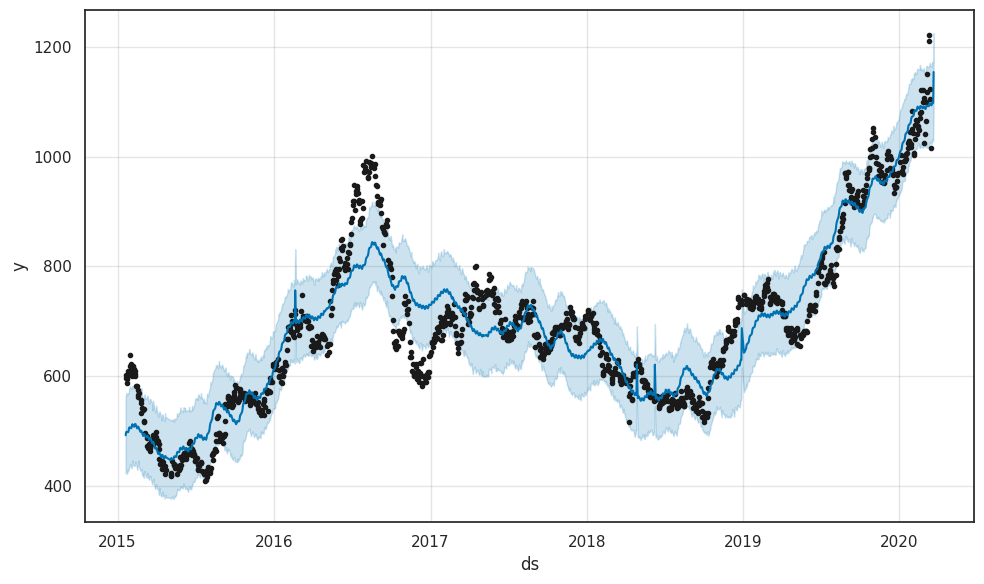

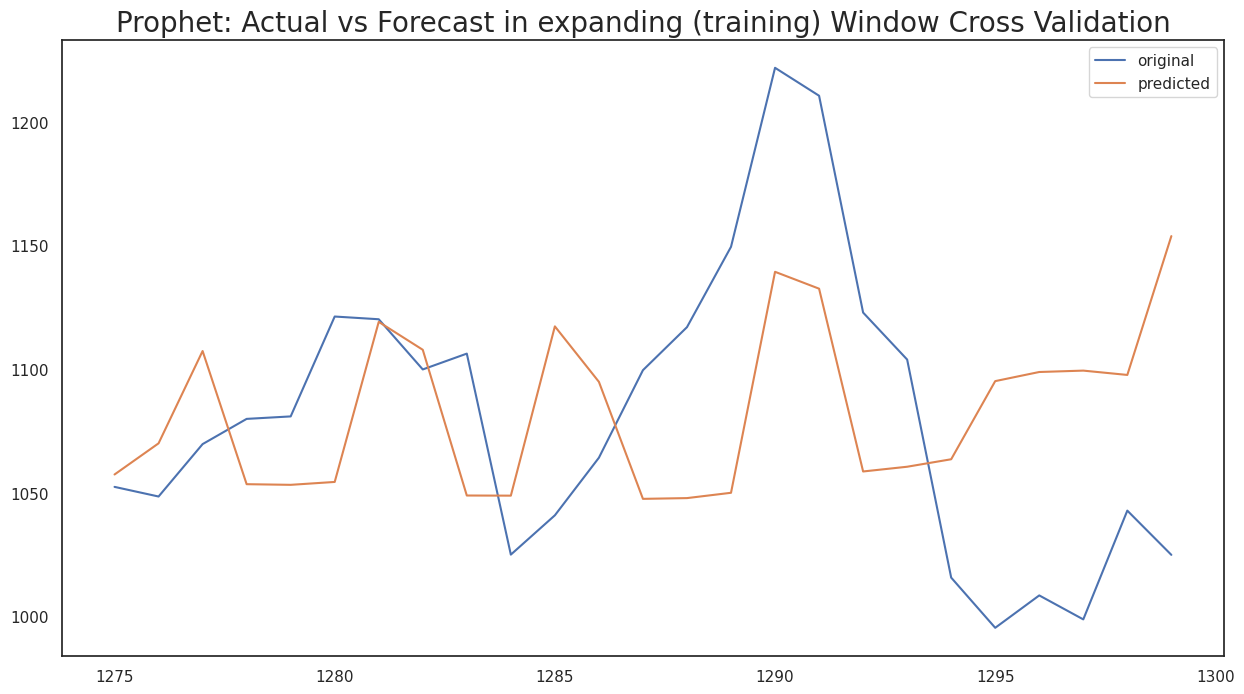

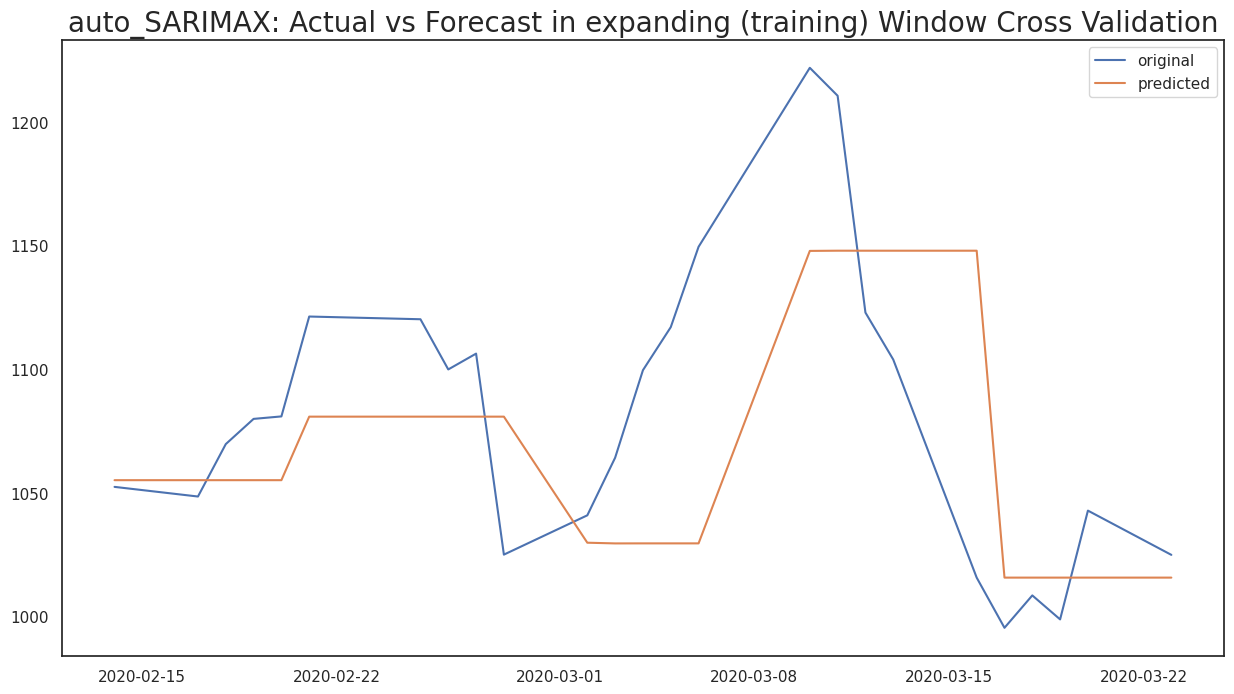

In [ ]:
# Создание модели
model = auto_timeseries(score_type='rmse',   # функция потерь
                        time_interval='D',   # дневной интервал
                        model_type='best',   # сохраняем лучшую модель
                        verbose=1)

# Создание обучающей и проверочной выборок
train, val = data.iloc[:1300], data.iloc[1300:]

# Обучение модели
model.fit(traindata=train,      # на выборке train
          ts_column='<DATE>',   # колонка с временными отсчетами
          target='<CLOSE>')     # целевая колонка

In [ ]:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,45.098987
0,Prophet,59.889886
2,ML,inf


Predicting using test dataframe as input for auto_SARIMAX model


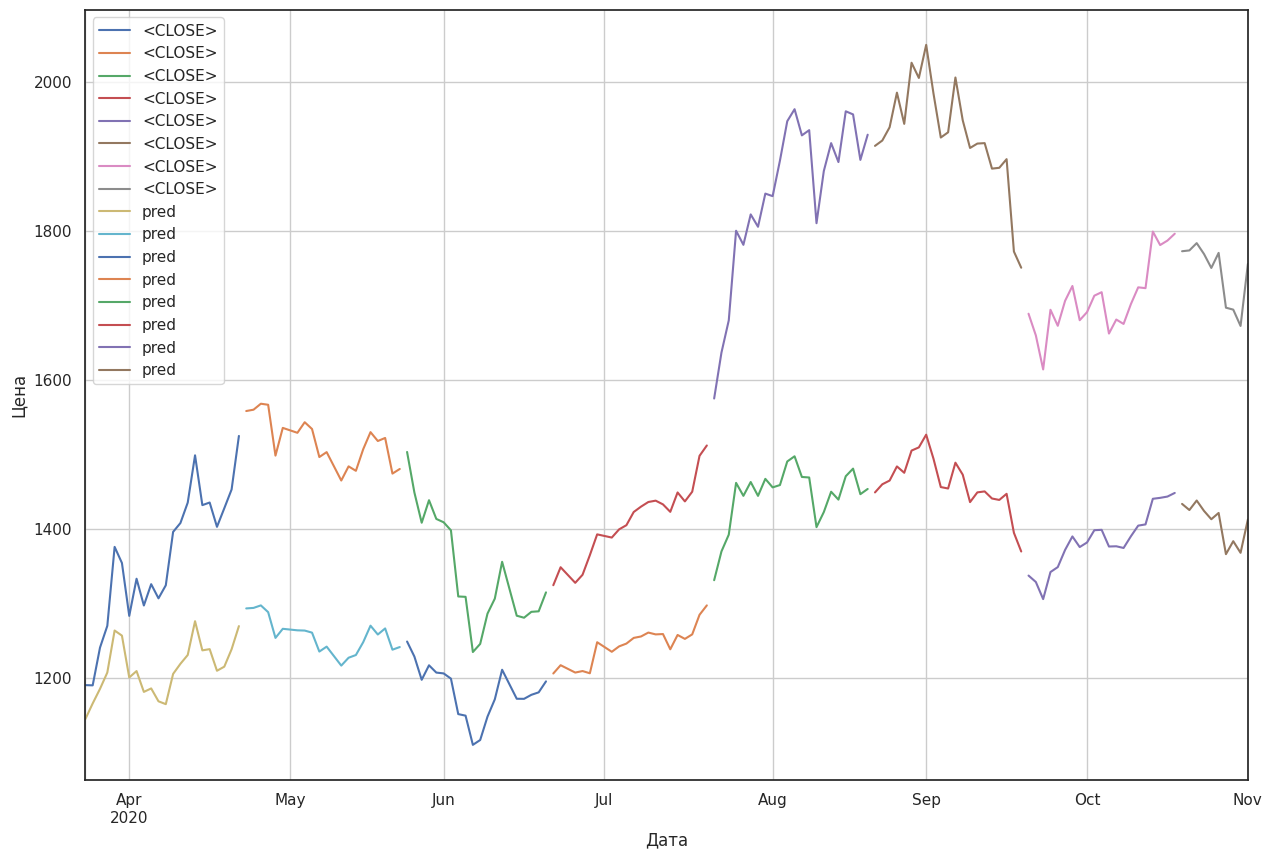

In [ ]:
pred = model.predict(val, model='auto_SARIMAX')['yhat'].to_numpy(float)
data = val.reset_index(drop=True)
data = data[['<DATE>', '<CLOSE>']]
data['pred'] = pred
data.set_index('<DATE>', inplace=True)
plt.figure(figsize=(15, 10))

data.resample('30D').plot()
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid()
plt.legend()
plt.show()

## Вариант 2. Использование генератора для доп. обработки данных и своя модель.

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding,
                                     Flatten, Activation, SimpleRNN, GRU, LSTM, Bidirectional, Conv1D,
                                     MaxPooling1D, GlobalMaxPooling1D, Input, Concatenate)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [5]:
# Нужно обновить 2-ю ячейку для получения начального data
data.set_index('<DATE>', inplace=True)
display(data.info())
data = data.to_numpy()
display(data.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1455 entries, 2015-01-20 to 2020-11-02
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <OPEN>     1455 non-null   float64
 1   <HIGH>     1455 non-null   float64
 2   <LOW>      1455 non-null   float64
 3   <CLOSE>    1455 non-null   float64
 4   <VOL>      1455 non-null   int64  
 5   pct_ch_1   1455 non-null   float64
 6   pct_ch_2   1455 non-null   float64
 7   pct_ch_3   1455 non-null   float64
 8   pct_ch_4   1455 non-null   float64
 9   pct_ch_5   1455 non-null   float64
 10  pct_ch_6   1455 non-null   float64
 11  pct_ch_7   1455 non-null   float64
 12  pct_ch_8   1455 non-null   float64
 13  pct_ch_9   1455 non-null   float64
 14  pct_ch_10  1455 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 181.9 KB


None

(1455, 15)

In [6]:
# Обработка и подготовка данных
def create_data(data, val_len, steps_forward=1, SEQ_LEN=10, BATCH_SIZE=5):
    train_len = data.shape[0] - val_len   # тренировочная выборка
    if steps_forward > 1:
        train, test = data[:train_len-steps_forward], \
                    data[train_len+SEQ_LEN+2:-steps_forward+1]
    if steps_forward == 1:
        train, test = data[:train_len-steps_forward], \
                    data[train_len+SEQ_LEN+2:-1]
    print('train, test:', train.shape, test.shape)

    # Train
    x_scaler = StandardScaler()
    x_train_scaled = x_scaler.fit_transform(train) # fit
    x_test_scaled = x_scaler.transform(test)
    print('x_train_scaled, x_test_scaled', x_train_scaled.shape, x_test_scaled.shape)

    if steps_forward > 1: # Y - срез от текущего до steps_forward шагов вперед по CLOSE (3-й столбец)
        y_train = np.array([data[:train_len, 3][i:i+steps_forward] for i in range(train_len-steps_forward)])
        y_test = np.array([data[train_len+SEQ_LEN+2:, 3][i:i+steps_forward] for i in range(val_len-SEQ_LEN-steps_forward-1)])
    if steps_forward == 1:
        y_train = train[:, 3].reshape(-1, 1) # столбец Close
        y_test = test[:, 3].reshape(-1, 1)
    y_scaler = MinMaxScaler()
    y_train_scaled = y_scaler.fit_transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    print('y_train_scaled, y_test_scaled', y_train_scaled.shape, y_test_scaled.shape)

    return x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, y_scaler


# Генераторы
def data_gen(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, SEQ_LEN, BATCH_SIZE):
    # Train генератор
    train_datagen = TimeseriesGenerator(x_train_scaled, y_train_scaled,
                                        length=SEQ_LEN, stride=1, sampling_rate=1,
                                        batch_size=BATCH_SIZE)
    print('train_datagen X, Y:',
        train_datagen[0][0].shape,
        train_datagen[0][1].shape)
    # Test генератор
    test_datagen = TimeseriesGenerator(x_test_scaled, y_test_scaled,
                                       length=SEQ_LEN, stride=1, sampling_rate=1,
                                       batch_size=BATCH_SIZE)
    print('test_datagen X, Y:',
        test_datagen[0][0].shape,
        test_datagen[0][1].shape)

    return train_datagen, test_datagen

# x, y для удобства проверки
def get_data_test(x_scaled, y_scaled, SEQ_LEN):
    datagen = TimeseriesGenerator(x_scaled, y_scaled,
                                  length=SEQ_LEN, sampling_rate=1,
                                  batch_size=x_scaled.shape[0])
    x, y = [], []
    for i in datagen:
        x.append(i[0])
        y.append(i[1])
    x = np.array(x)
    y = np.array(y)
    print('x[0]:', x[0].shape)
    print('y[0]:', y[0].shape)
    return x, y


def draw_loss(history):
    plt.subplots(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train mse')
    plt.plot(history.history['val_loss'], label='Test mse')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()


def correlate(a, b):
    return np.corrcoef(a, b)[0, 1]


def get_pred(model, x, y, y_scaler):
    y_pred = y_scaler.inverse_transform(model.predict(x))
    y_test = y_scaler.inverse_transform(y)
    return y_pred, y_test


# Графики Цены
def show_predict(start, step, channel, y_pred_val, y_val):
    plt.subplots(figsize=(10, 5))
    plt.plot(y_pred_val[start:start+step, channel], label=f'Прогноз (канал: {channel})')
    plt.plot(y_val[start:start+step, channel], label='Факт')
    plt.xlabel('Время')
    plt.ylabel('Close')
    plt.legend()
    plt.show()


def show_corr(channels, corr_steps, y_pred_val, y_val):
    plt.subplots(figsize=(10, 5))
    for ch in channels:
        corr = []
        y_len = y_val.shape[0]
        for i in range(corr_steps):
            corr.append(correlate(y_val[:y_len-i, ch], y_pred_val[i:, ch]))
        own_corr = []
        for i in range(corr_steps):
            own_corr.append(correlate(y_val[:y_len-i, ch], y_val[i:, ch]))
        plt.plot(corr, label='предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.title('Корреляция')
    plt.legend()
    plt.show()

train, test: (1154, 15) (247, 15)
x_train_scaled, x_test_scaled (1154, 15) (247, 15)
y_train_scaled, y_test_scaled (1154, 1) (247, 1)
train_datagen X, Y: (5, 50, 15) (5, 1)
test_datagen X, Y: (5, 50, 15) (5, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50, 200)           3200      
                                                                 
 dense_1 (Dense)             (None, 50, 20)            4020      
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 8221 (32.11 KB)
Trainable params: 8221 (32.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________

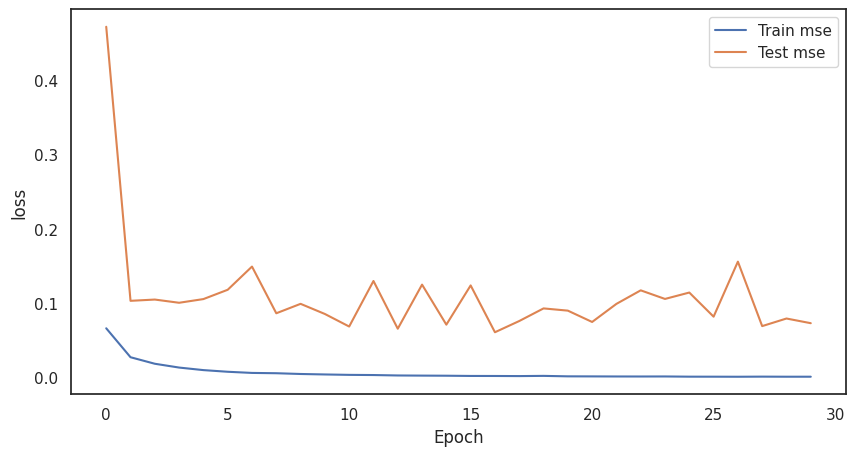

x[0]: (197, 50, 15)
y[0]: (197, 1)
7/7 [==============================] - 0s 3ms/step
(197, 1) (197, 1)


In [7]:
steps_forward = 1    # шаг предсказания
val_len = 300        # тест выборка (включая разрыв)
SEQ_LEN = 50
BATCH_SIZE = 5

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, y_scaler = \
create_data(data, val_len, steps_forward, SEQ_LEN, BATCH_SIZE)

train_datagen, test_datagen = \
data_gen(x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, SEQ_LEN, BATCH_SIZE)

# Dense ----------------------------------
model = Sequential()
model.add(Dense(200, input_shape=(train_datagen[0][0].shape[1:]), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Flatten())
model.add(Dense(train_datagen[0][1].shape[1], activation='linear'))
# ----------------------------------------

model.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

history = model.fit(train_datagen,
                    epochs=30,
                    verbose=0,
                    validation_data = test_datagen)
model.summary()
draw_loss(history)
x_gen, y_gen = get_data_test(x_test_scaled, y_test_scaled, SEQ_LEN)
y_pred_val, y_val = get_pred(model, x_gen[0], y_gen[0], y_scaler)
print(y_pred_val.shape, y_val.shape)

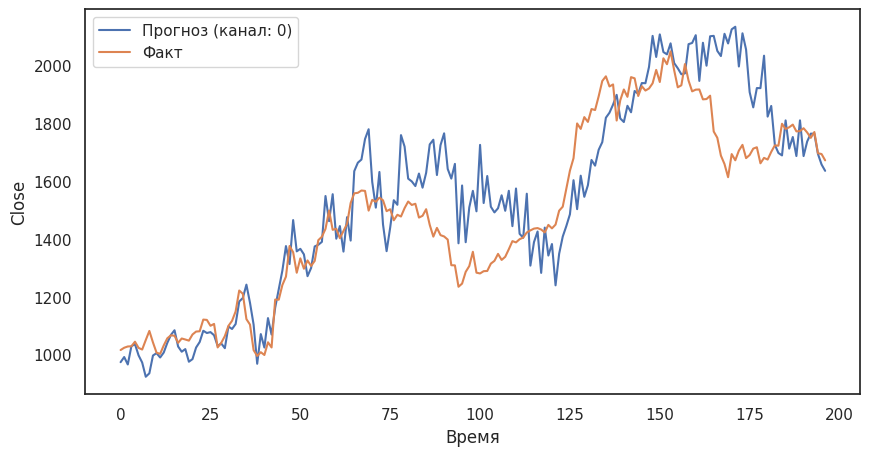

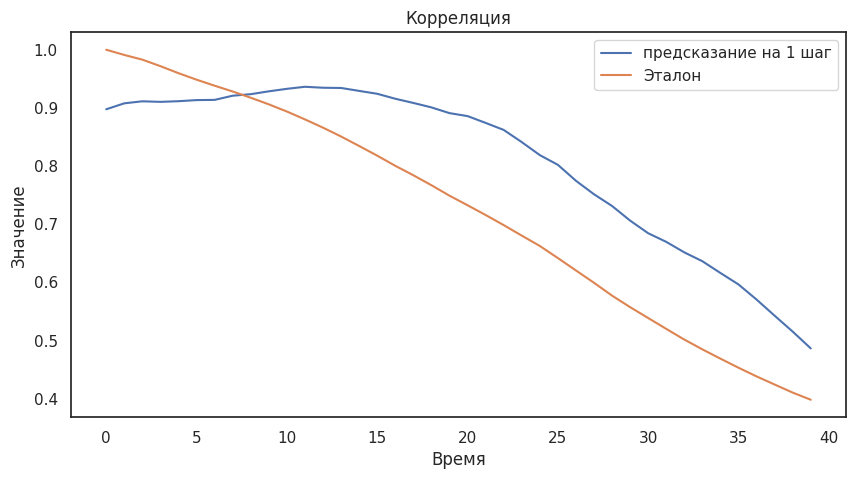

In [10]:
show_predict(0, 197, 0, y_pred_val, y_val)
show_corr([0], 40, y_pred_val, y_val)